# # Task 1: Event Research and Dataset Creation
# 
# **Objective:** Research major geopolitical/economic events and compile structured dataset
# **Requirements:** Minimum 10-15 events with dates and descriptions
# 
# Based on preliminary analysis, we identified these key volatility periods:
# - 1990-1991: Gulf War
# - 2008-2009: Global Financial Crisis
# - 2014-2015: Oil price crash
# - 2020: COVID-19 pandemic
# - 2022: Russia-Ukraine conflict

In [1]:
# Cell 1: Setup
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

# Load our processed data
brent_df = pd.read_csv('../data/processed/brent_prices_with_features.csv', parse_dates=['Date'])
print(f"Loaded data: {len(brent_df)} records from {brent_df['Date'].min().date()} to {brent_df['Date'].max().date()}")

# %%

C:\Users\Josh\AppData\Local\Temp\ipykernel_26196\2293512552.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Loaded data: 9011 records from 1987-05-20 to 2022-11-14


In [2]:
# Cell 2: Research key events affecting oil prices
# Based on historical research and our volatility analysis

events_data = [
    # 1990s Events
    {
        'event_date': '1990-08-02',
        'event_name': 'Iraq invades Kuwait',
        'event_type': 'Geopolitical Conflict',
        'description': 'Iraq invasion leads to Gulf War, disrupting Middle East oil supply',
        'impact_direction': 'positive',  # Price increase
        'duration_days': 180,
        'region': 'Middle East'
    },
    {
        'event_date': '1991-01-17',
        'event_name': 'Operation Desert Storm begins',
        'event_type': 'Military Action',
        'description': 'US-led coalition attacks Iraq to liberate Kuwait',
        'impact_direction': 'negative',  # Price decrease as uncertainty resolves
        'duration_days': 42,
        'region': 'Middle East'
    },
    {
        'event_date': '1997-11-30',
        'event_name': 'Asian Financial Crisis',
        'event_type': 'Economic Crisis',
        'description': 'Currency crisis spreads across Asia, reducing oil demand',
        'impact_direction': 'negative',
        'duration_days': 365,
        'region': 'Asia'
    },
    
    # 2000s Events
    {
        'event_date': '2001-09-11',
        'event_name': '9/11 Terrorist Attacks',
        'event_type': 'Geopolitical/Terrorism',
        'description': 'Terrorist attacks on US lead to global uncertainty and military response',
        'impact_direction': 'positive',
        'duration_days': 90,
        'region': 'Global'
    },
    {
        'event_date': '2003-03-20',
        'event_name': 'Iraq War begins',
        'event_type': 'Geopolitical Conflict',
        'description': 'US-led invasion of Iraq creates oil supply uncertainty',
        'impact_direction': 'positive',
        'duration_days': 60,
        'region': 'Middle East'
    },
    {
        'event_date': '2005-08-29',
        'event_name': 'Hurricane Katrina',
        'event_type': 'Natural Disaster',
        'description': 'Devastates US Gulf Coast, disrupting oil production and refining',
        'impact_direction': 'positive',
        'duration_days': 30,
        'region': 'North America'
    },
    {
        'event_date': '2008-07-11',
        'event_name': 'Oil price peaks at $147',
        'event_type': 'Market Extreme',
        'description': 'Brent crude reaches all-time high amid speculation and strong demand',
        'impact_direction': 'peak',
        'duration_days': 1,
        'region': 'Global'
    },
    {
        'event_date': '2008-09-15',
        'event_name': 'Lehman Brothers collapse',
        'event_type': 'Financial Crisis',
        'description': 'Global financial crisis begins, crushing oil demand',
        'impact_direction': 'negative',
        'duration_days': 180,
        'region': 'Global'
    },
    
    # 2010s Events
    {
        'event_date': '2011-02-15',
        'event_name': 'Arab Spring spreads to Libya',
        'event_type': 'Geopolitical Conflict',
        'description': 'Civil war in Libya disrupts oil exports',
        'impact_direction': 'positive',
        'duration_days': 210,
        'region': 'Middle East/North Africa'
    },
    {
        'event_date': '2014-06-20',
        'event_name': 'OPEC maintains production',
        'event_type': 'OPEC Decision',
        'description': 'OPEC decides not to cut production despite oversupply, starting price crash',
        'impact_direction': 'negative',
        'duration_days': 540,
        'region': 'Global'
    },
    {
        'event_date': '2016-11-30',
        'event_name': 'OPEC production cut agreement',
        'event_type': 'OPEC Decision',
        'description': 'OPEC and non-OPEC agree to cut production by 1.8 million barrels/day',
        'impact_direction': 'positive',
        'duration_days': 180,
        'region': 'Global'
    },
    
    # 2020s Events
    {
        'event_date': '2020-03-11',
        'event_name': 'WHO declares COVID-19 pandemic',
        'event_type': 'Pandemic',
        'description': 'Global lockdowns collapse oil demand',
        'impact_direction': 'negative',
        'duration_days': 60,
        'region': 'Global'
    },
    {
        'event_date': '2020-04-20',
        'event_name': 'WTI crude goes negative',
        'event_type': 'Market Extreme',
        'description': 'US oil futures contract closes at -$37.63 due to storage crisis',
        'impact_direction': 'negative',
        'duration_days': 7,
        'region': 'Global'
    },
    {
        'event_date': '2022-02-24',
        'event_name': 'Russia invades Ukraine',
        'event_type': 'Geopolitical Conflict',
        'description': 'War leads to sanctions on Russian oil, disrupting global supply',
        'impact_direction': 'positive',
        'duration_days': 90,
        'region': 'Europe'
    },
    {
        'event_date': '2022-10-05',
        'event_name': 'OPEC+ production cut',
        'event_type': 'OPEC Decision',
        'description': 'OPEC+ agrees to cut production by 2 million barrels/day',
        'impact_direction': 'positive',
        'duration_days': 30,
        'region': 'Global'
    }
]

# Create events dataframe
events_df = pd.DataFrame(events_data)
events_df['event_date'] = pd.to_datetime(events_df['event_date'])

print(f"Created events dataset with {len(events_df)} events")
print("\nEvents by type:")
print(events_df['event_type'].value_counts())

# %%

Created events dataset with 15 events

Events by type:
event_type
Geopolitical Conflict     4
OPEC Decision             3
Market Extreme            2
Military Action           1
Economic Crisis           1
Geopolitical/Terrorism    1
Natural Disaster          1
Financial Crisis          1
Pandemic                  1
Name: count, dtype: int64


In [3]:
# Cell 3: Validate events against price data
# Check which events fall within our data range
valid_events = events_df[
    (events_df['event_date'] >= brent_df['Date'].min()) & 
    (events_df['event_date'] <= brent_df['Date'].max())
].copy()

print(f"Events within data range ({brent_df['Date'].min().date()} to {brent_df['Date'].max().date()}): {len(valid_events)}")
print(f"Events outside range: {len(events_df) - len(valid_events)}")

if len(valid_events) < len(events_df):
    outside = events_df[~events_df['event_date'].isin(valid_events['event_date'])]
    print("\nEvents outside data range:")
    for _, event in outside.iterrows():
        print(f"  • {event['event_name']} ({event['event_date'].date()})")

# %%

Events within data range (1987-05-20 to 2022-11-14): 15
Events outside range: 0


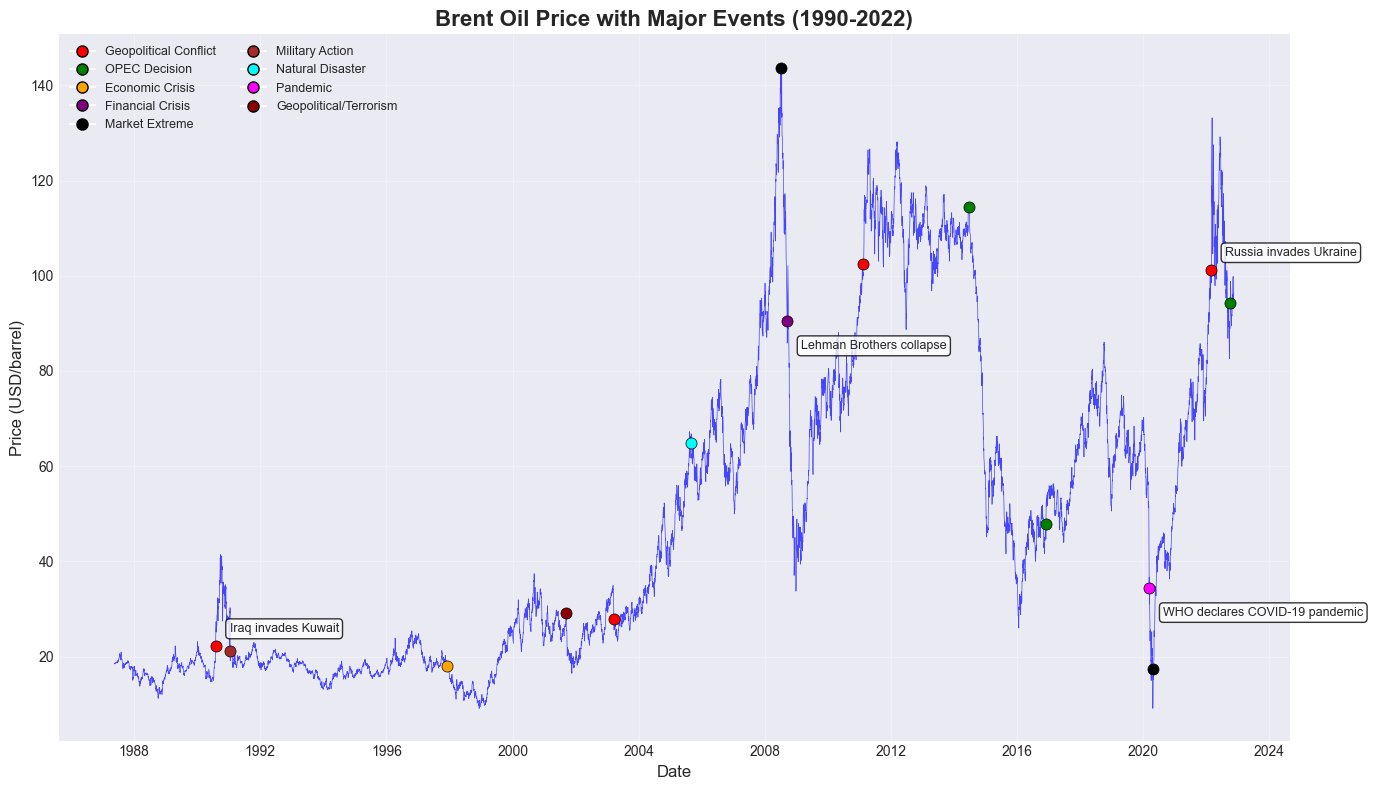

In [4]:
# Cell 4: Visualize events on price timeline
fig, ax = plt.subplots(figsize=(14, 8))

# Plot price
ax.plot(brent_df['Date'], brent_df['Price'], 'b-', alpha=0.7, linewidth=0.5, label='Brent Price')

# Color code events by type
event_colors = {
    'Geopolitical Conflict': 'red',
    'OPEC Decision': 'green',
    'Economic Crisis': 'orange',
    'Financial Crisis': 'purple',
    'Market Extreme': 'black',
    'Military Action': 'brown',
    'Natural Disaster': 'cyan',
    'Pandemic': 'magenta',
    'Geopolitical/Terrorism': 'darkred'
}

# Plot events
for _, event in valid_events.iterrows():
    color = event_colors.get(event['event_type'], 'gray')
    
    # Find closest trading day
    event_date = event['event_date']
    closest_idx = (brent_df['Date'] - event_date).abs().idxmin()
    closest_date = brent_df.loc[closest_idx, 'Date']
    price_at_event = brent_df.loc[closest_idx, 'Price']
    
    # Plot marker
    ax.plot(closest_date, price_at_event, 'o', color=color, markersize=8, 
            markeredgecolor='black', markeredgewidth=0.5)
    
    # Add label for major events
    if event['event_name'] in ['Iraq invades Kuwait', 'Lehman Brothers collapse', 
                               'WHO declares COVID-19 pandemic', 'Russia invades Ukraine']:
        ax.annotate(event['event_name'], 
                   xy=(closest_date, price_at_event),
                   xytext=(10, 10 if 'invades' in event['event_name'] else -20),
                   textcoords='offset points',
                   fontsize=9,
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# Formatting
ax.set_title('Brent Oil Price with Major Events (1990-2022)', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price (USD/barrel)', fontsize=12)
ax.grid(True, alpha=0.3)

# Create legend for event types
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, 
                         markersize=8, label=etype, markeredgecolor='black')
                  for etype, color in event_colors.items()]
ax.legend(handles=legend_elements, loc='upper left', fontsize=9, ncol=2)

plt.tight_layout()
plt.savefig('../reports/figures/events_on_timeline.png', dpi=300, bbox_inches='tight')
plt.show()

# %%

In [5]:
# Cell 5: Analyze price changes around events
print("="*70)
print("PRICE CHANGES AROUND MAJOR EVENTS")
print("="*70)

# Function to get price change around event
def get_price_change(event_date, days_before=5, days_after=5):
    """Get price change around an event date."""
    event_date = pd.Timestamp(event_date)
    
    # Find closest trading day
    date_diff = (brent_df['Date'] - event_date).abs()
    closest_idx = date_diff.idxmin()
    closest_date = brent_df.loc[closest_idx, 'Date']
    
    # Get prices before and after
    idx = brent_df.index.get_loc(closest_idx)
    
    # Ensure we have enough data points
    if idx >= days_before and idx + days_after < len(brent_df):
        price_before = brent_df.loc[idx - days_before, 'Price']
        price_at_event = brent_df.loc[idx, 'Price']
        price_after = brent_df.loc[idx + days_after, 'Price']
        
        change_to_event = ((price_at_event - price_before) / price_before) * 100
        change_after_event = ((price_after - price_at_event) / price_at_event) * 100
        
        return {
            'closest_trading_date': closest_date,
            'price_before': price_before,
            'price_at_event': price_at_event,
            'price_after': price_after,
            'pct_change_to_event': change_to_event,
            'pct_change_after_event': change_after_event
        }
    return None

# Analyze each event
event_analysis = []
for _, event in valid_events.iterrows():
    changes = get_price_change(event['event_date'])
    if changes:
        analysis = {
            'event_name': event['event_name'],
            'event_date': event['event_date'].date(),
            'event_type': event['event_type'],
            'trading_date': changes['closest_trading_date'].date(),
            'price_change_to_event_pct': changes['pct_change_to_event'],
            'price_change_after_event_pct': changes['pct_change_after_event'],
            'impact_direction': event['impact_direction']
        }
        event_analysis.append(analysis)

# Create analysis dataframe
analysis_df = pd.DataFrame(event_analysis)

# Display results
print("\nPrice Changes (5 days before/after event):")
print(analysis_df[['event_name', 'event_type', 'price_change_to_event_pct', 
                   'price_change_after_event_pct', 'impact_direction']].to_string())

# Summary statistics
print("\n" + "="*70)
print("SUMMARY STATISTICS")
print("="*70)

print(f"\nAverage price change 5 days leading to event: {analysis_df['price_change_to_event_pct'].mean():.1f}%")
print(f"Average price change 5 days after event: {analysis_df['price_change_after_event_pct'].mean():.1f}%")

print("\nBy event type:")
type_stats = analysis_df.groupby('event_type').agg({
    'price_change_to_event_pct': 'mean',
    'price_change_after_event_pct': 'mean'
}).round(1)
print(type_stats)

# %%

PRICE CHANGES AROUND MAJOR EVENTS

Price Changes (5 days before/after event):
                        event_name              event_type  price_change_to_event_pct  price_change_after_event_pct impact_direction
0              Iraq invades Kuwait   Geopolitical Conflict                  18.793380                     16.404494         positive
1    Operation Desert Storm begins         Military Action                 -20.617005                     -0.947867         negative
2           Asian Financial Crisis         Economic Crisis                  -5.260389                     -0.777346         negative
3           9/11 Terrorist Attacks  Geopolitical/Terrorism                  10.848877                     -5.425824         positive
4                  Iraq War begins   Geopolitical Conflict                 -17.598587                     -2.535714         positive
5                Hurricane Katrina        Natural Disaster                  -1.669956                     -0.941794         

In [6]:
# Cell 6: Save events dataset
# Save to multiple formats
events_output_path = '../data/processed/key_events.csv'
valid_events.to_csv(events_output_path, index=False)
print(f"✓ Events dataset saved to: {events_output_path}")

# Also save with analysis
events_with_analysis = valid_events.merge(
    analysis_df[['event_name', 'price_change_to_event_pct', 'price_change_after_event_pct']],
    on='event_name',
    how='left'
)

analysis_output_path = '../data/processed/events_with_analysis.csv'
events_with_analysis.to_csv(analysis_output_path, index=False)
print(f"✓ Events with analysis saved to: {analysis_output_path}")

# Save a markdown version for documentation
md_output_path = '../reports/key_events.md'
with open(md_output_path, 'w') as f:
    f.write("# Key Events Affecting Brent Oil Prices\n\n")
    f.write(f"**Generated:** {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write(f"**Total Events:** {len(valid_events)}\n")
    f.write(f"**Date Range:** {valid_events['event_date'].min().date()} to {valid_events['event_date'].max().date()}\n\n")
    
    f.write("## Events by Type\n")
    for etype, count in valid_events['event_type'].value_counts().items():
        f.write(f"- **{etype}**: {count} events\n")
    
    f.write("\n## Event Details\n")
    for _, event in valid_events.iterrows():
        f.write(f"\n### {event['event_name']}\n")
        f.write(f"- **Date**: {event['event_date'].date()}\n")
        f.write(f"- **Type**: {event['event_type']}\n")
        f.write(f"- **Region**: {event['region']}\n")
        f.write(f"- **Expected Impact**: {event['impact_direction'].upper()}\n")
        f.write(f"- **Description**: {event['description']}\n")

print(f"✓ Markdown documentation saved to: {md_output_path}")

# %%

✓ Events dataset saved to: ../data/processed/key_events.csv
✓ Events with analysis saved to: ../data/processed/events_with_analysis.csv
✓ Markdown documentation saved to: ../reports/key_events.md


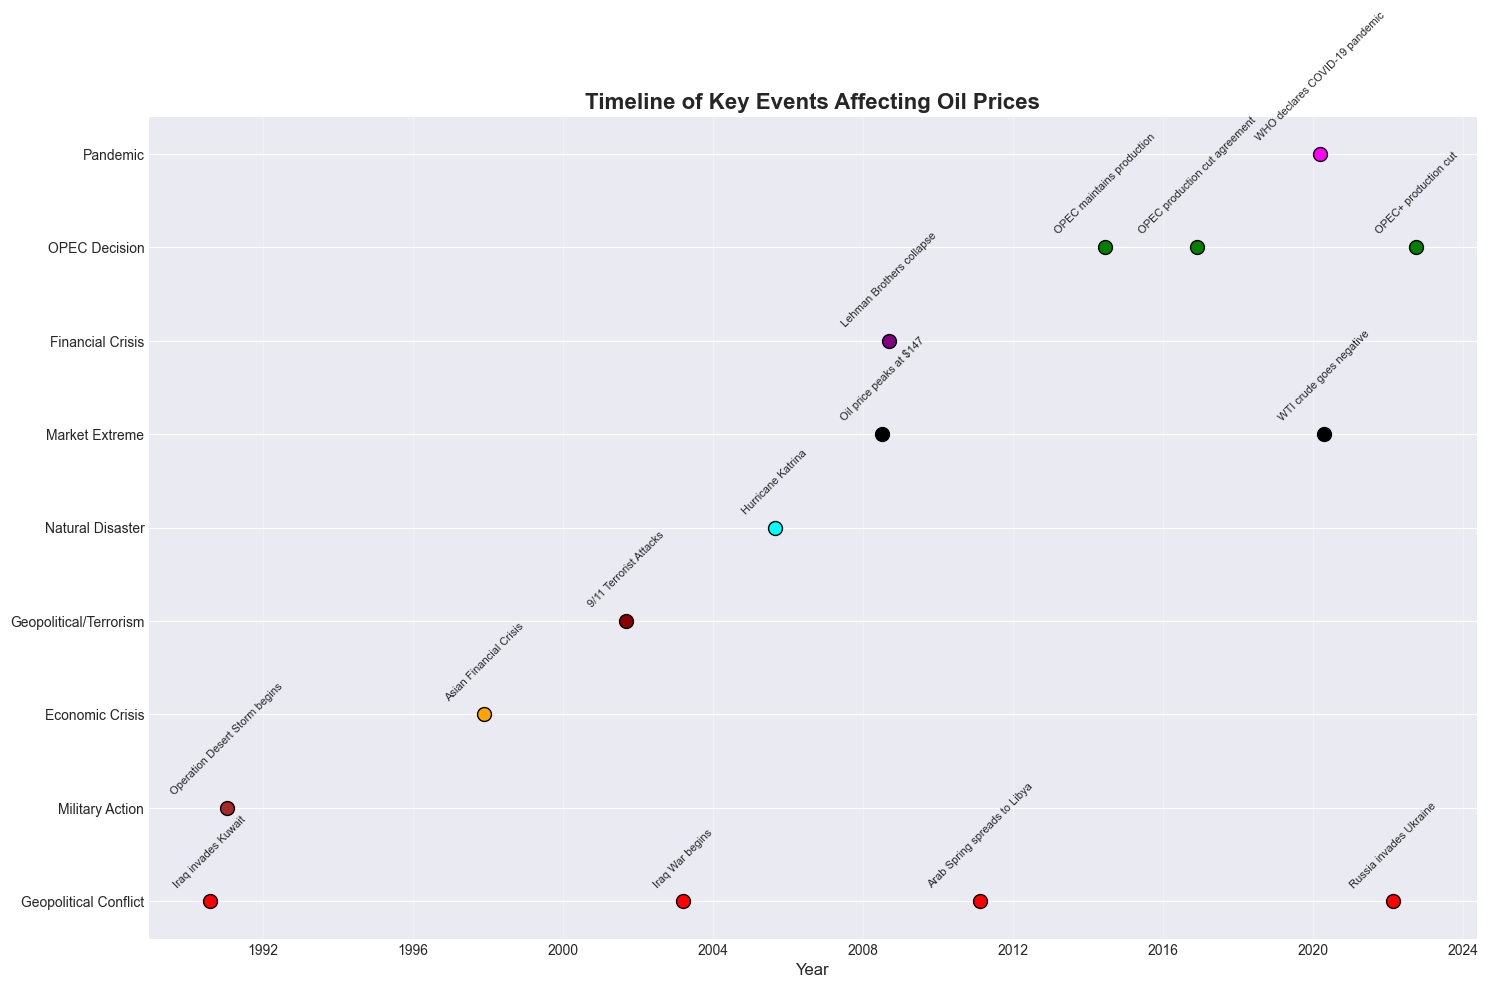


EVENT RESEARCH COMPLETE
✓ Researched and documented 15 key events
✓ Created structured dataset: ../data/processed/key_events.csv
✓ Generated visualizations in ../reports/figures/
✓ Created documentation: ../reports/key_events.md

Next: Complete Task 1 deliverables (assumptions, workflow document)


In [7]:
# Cell 7: Create event calendar visualization
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Create event timeline
fig, ax = plt.subplots(figsize=(15, 10))

# Plot events on timeline
years = list(range(1990, 2023))
y_positions = {}

# Assign y-positions by event type to avoid overlap
event_types = valid_events['event_type'].unique()
for i, etype in enumerate(event_types):
    y_positions[etype] = i * 0.8

# Plot each event
for _, event in valid_events.iterrows():
    y = y_positions[event['event_type']]
    color = event_colors.get(event['event_type'], 'gray')
    
    ax.plot(event['event_date'], y, 'o', color=color, markersize=10, 
            markeredgecolor='black', markeredgewidth=1)
    
    # Add event name
    ax.text(event['event_date'], y + 0.1, event['event_name'], 
           fontsize=8, ha='center', va='bottom', rotation=45)

# Formatting
ax.set_yticks(list(y_positions.values()))
ax.set_yticklabels(list(y_positions.keys()))
ax.set_xlabel('Year', fontsize=12)
ax.set_title('Timeline of Key Events Affecting Oil Prices', fontsize=16, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('../reports/figures/event_timeline.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*70)
print("EVENT RESEARCH COMPLETE")
print("="*70)
print(f"✓ Researched and documented {len(valid_events)} key events")
print(f"✓ Created structured dataset: ../data/processed/key_events.csv")
print(f"✓ Generated visualizations in ../reports/figures/")
print(f"✓ Created documentation: ../reports/key_events.md")
print("\nNext: Complete Task 1 deliverables (assumptions, workflow document)")